AIM: In this notebook, we learn how to use scikit-lean to implement simple linear regression.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

In [26]:
df = pd.read_csv('Fuel Consumption.csv')

In [27]:
df

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,2024,Volvo,V60 CC B5 AWD,Station wagon: Small,2.0,4,AS8,Z,10.0,7.5,8.9,32,207,5,5
760,2024,Volvo,V90 CC B6 AWD,Station wagon: Mid-size,2.0,4,AS8,Z,10.7,8.1,9.5,30,223,5,7
761,2024,Volvo,XC40 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,9.9,7.8,9.0,31,210,5,5
762,2024,Volvo,XC60 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,10.6,8.3,9.6,29,226,5,5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            764 non-null    int64  
 1   Make                  764 non-null    object 
 2   Model                 764 non-null    object 
 3   Vehicle class         764 non-null    object 
 4   Engine size (L)       764 non-null    float64
 5   Cylinders             764 non-null    int64  
 6   Transmission          764 non-null    object 
 7   Fuel type             764 non-null    object 
 8   City (L/100 km)       764 non-null    float64
 9   Highway (L/100 km)    764 non-null    float64
 10  Combined (L/100 km)   764 non-null    float64
 11  Combined (mpg)        764 non-null    int64  
 12  CO2 emissions (g/km)  764 non-null    int64  
 13  CO2 rating            764 non-null    int64  
 14  Smog rating           764 non-null    int64  
dtypes: float64(4), int64(6)

In [29]:
df.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,764.0,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,2024.0,3.078010,5.534031,12.395550,9.425393,11.060079,27.361257,258.920157,4.484293,5.494764
std,0.0,1.264461,1.892288,3.394191,2.307174,2.847954,7.718533,64.954103,1.305705,1.609677
min,2024.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2024.0,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,210.000000,4.000000,5.000000
50%,2024.0,2.900000,6.000000,12.200000,9.300000,10.950000,26.000000,260.000000,4.000000,6.000000
75%,2024.0,3.600000,6.000000,14.500000,10.800000,12.725000,31.000000,299.000000,5.000000,7.000000
max,2024.0,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,8.000000,8.000000


In [30]:
df['Model year'].nunique()

1

In [31]:
df.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)',
       'CO2 emissions (g/km)', 'CO2 rating', 'Smog rating'],
      dtype='object')

In [11]:
cdf = df[['Engine size (L)', 'Cylinders', 'Combined (mpg)', 'CO2 emissions (g/km)']]
cdf

,Engine size (L),Cylinders,Combined (mpg),CO2 emissions (g/km)
0,1.5,4,38,172
1,1.5,4,36,181
2,2.0,4,29,230
3,3.5,6,25,263
4,3.0,6,23,291
...,...,...,...,...
759,2.0,4,32,207
760,2.0,4,30,223
761,2.0,4,31,210
762,2.0,4,29,226


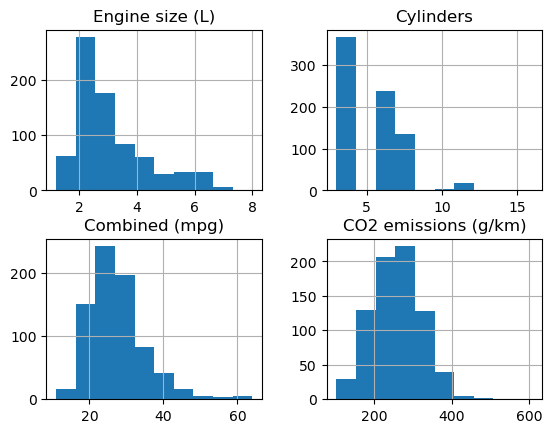

In [13]:
viz = cdf
viz.hist()
plt.show()

Summary:
- Engine size and cylinders: The data shows that most vehicles are smaller in engine size and cylinder count, which is typical for fuel-efficient or more environmentally friendly vehicles.
- Fuel Consumption and CO2 Emissions: Suggests that vehicles with better fuel economy (higher mpg) generaly dominate the dataset, while higher CO2 emissions are less common but present in the data

<Axes: ylabel='Frequency'>

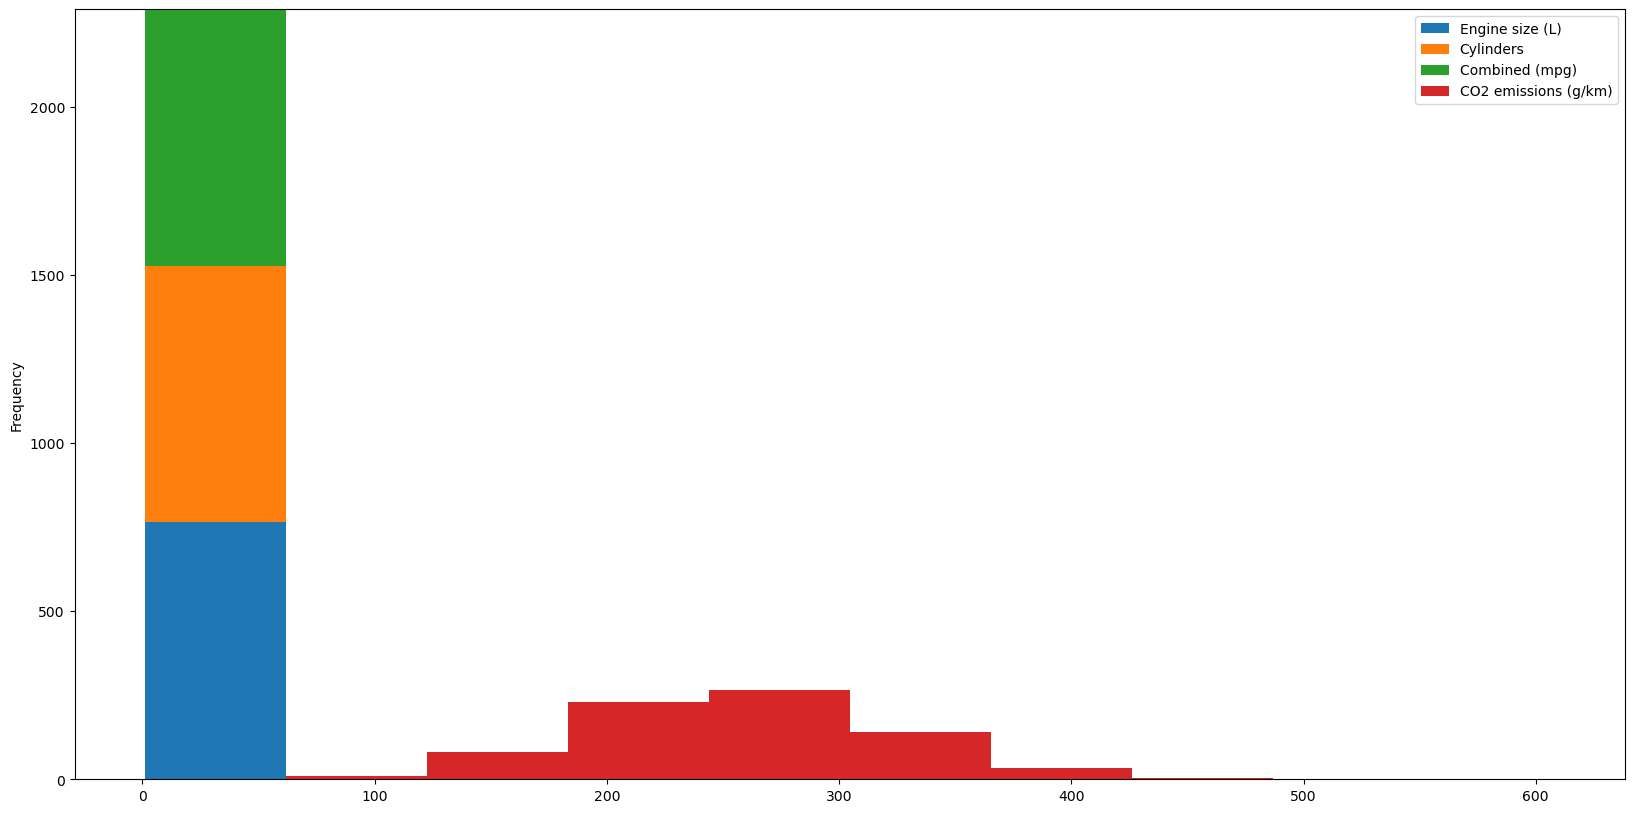

In [36]:
cdf.plot(kind = 'hist', figsize = (20,10), stacked = True)

Observation:
This distribution shows that most vehicles have smaller engines (1.5L to 3.5L), fewer cylinders (4 to 6), and higher fuel efficiency, leading to lower CO2 emissions (100 to 300 g/km). Only a few vehicles have larger engines, more cylinders, and higher emissions, with CO2 emissions extending up to 600 g/km. This reflects a trend towards more fuel-efficient, low-emission vehicles.

Text(0.5, 1.0, 'Engine Size vs CO2 Emission')

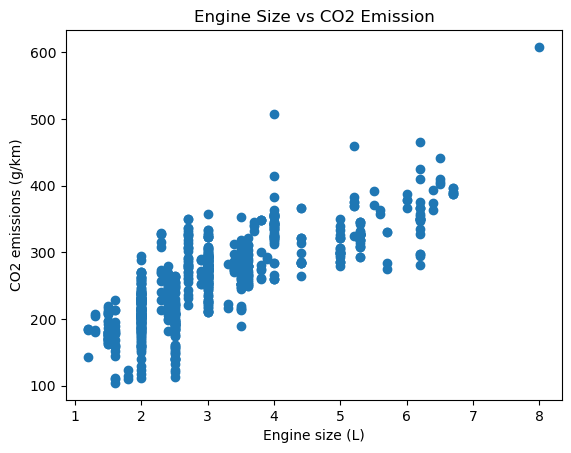

In [55]:
# Plotting a linear plot for each feature against CO2 emission
plt.scatter(cdf['Engine size (L)'], cdf['CO2 emissions (g/km)'])
plt.xlabel('Engine size (L)')
plt.ylabel('CO2 emissions (g/km)')
plt.title('Engine Size vs CO2 Emission')

Engine size and CO2 emissions tends to have a positve relationship, as the the engine size increases the CO2 emitted also increases.

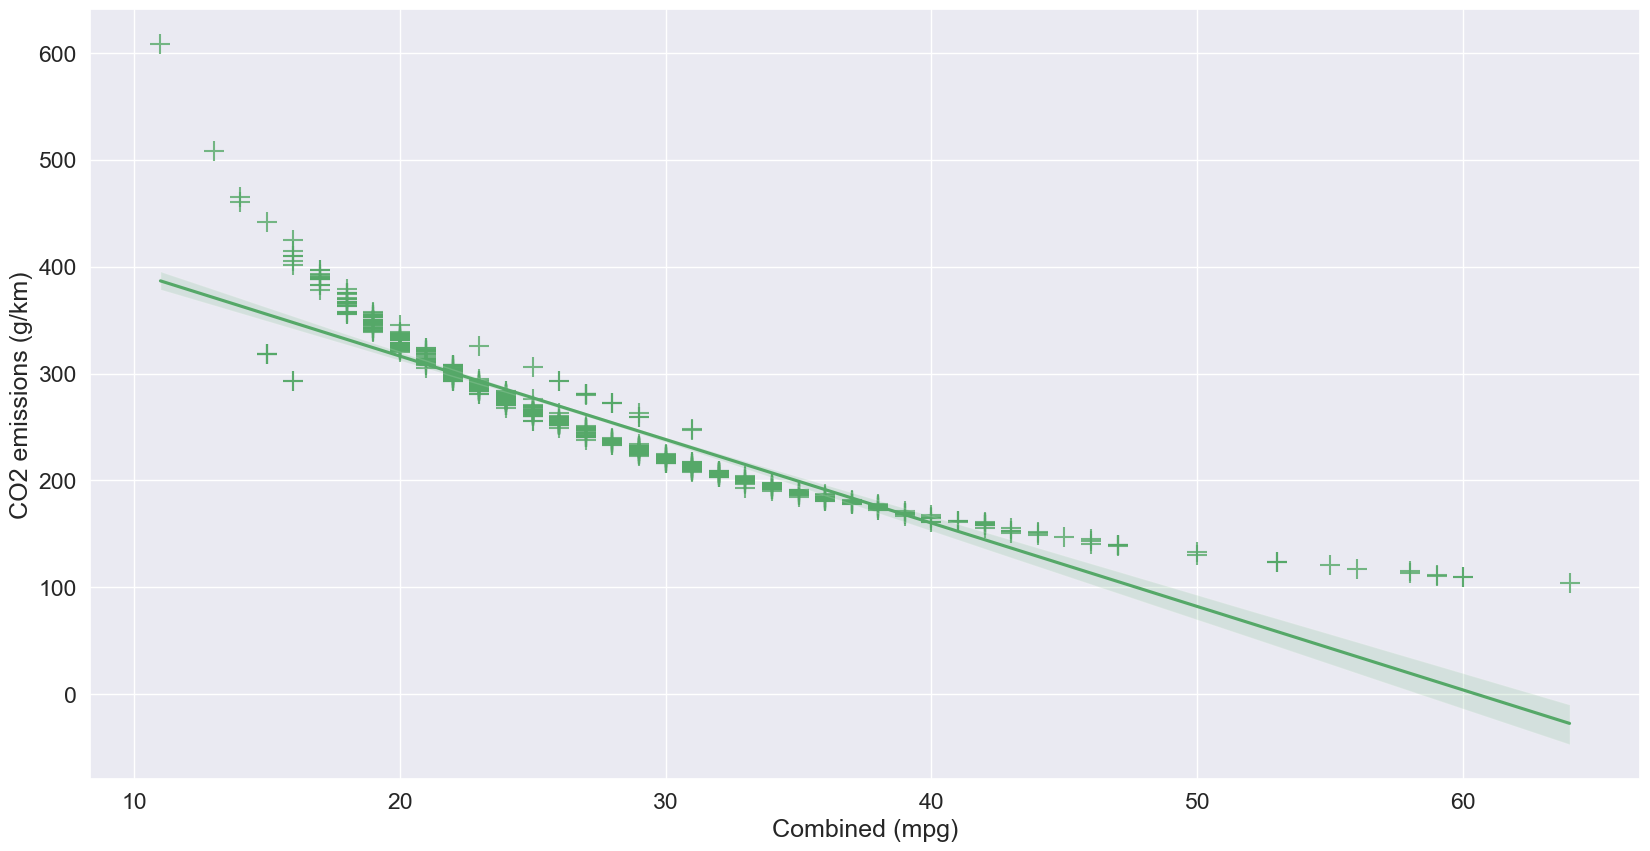

In [73]:
plt.figure(figsize = (20, 10))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
ax = sns.regplot(x = 'Combined (mpg)', y ='CO2 emissions (g/km)', data = cdf, color = 'g', scatter_kws = {'s': 200}, marker = '+')

Combined fuel consumption and CO2 emissions have a negative correlation, as fuel consumption increases, CO2 emission decreases. The relationship between them tends to be curvy where CO2 emissions decrease more sharply at lower mpg values and is likely to level off as mpg increases.

Text(0, 0.5, 'CO2 emissions (g/km)')

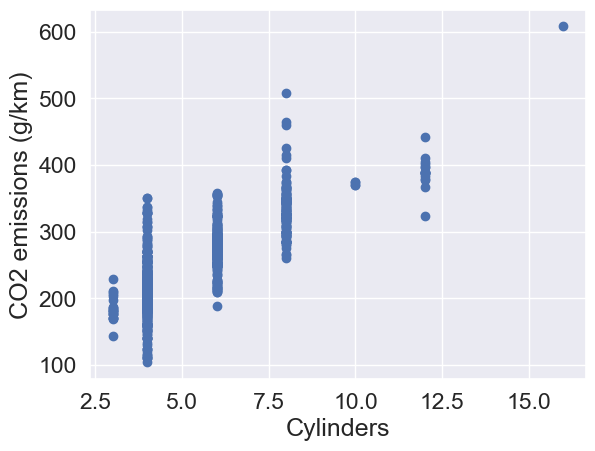

In [74]:
plt.scatter(cdf['Cylinders'], cdf['CO2 emissions (g/km)'])
plt.xlabel('Cylinders')
plt.ylabel('CO2 emissions (g/km)')

Cylinders in a vehicle and CO2 emissioin tends to have a positve linear relationship as the number of cylinders increases, CO2 emission also increases

In [88]:
rdm = np.random.rand(len(df))<0.8
train = cdf[rdm]
test = cdf[~rdm]

In [91]:
print(test)
print(train)
X_test 
y_test 

     Engine size (L)  Cylinders  Combined (mpg)  CO2 emissions (g/km)
0                1.5          4              38                   172
10               2.0          4              30                   218
17               4.0          8              20                   329
20               2.0          4              32                   208
21               2.0          4              31                   215
..               ...        ...             ...                   ...
734              3.4          6              24                   275
738              3.4          6              23                   287
748              1.5          4              41                   162
751              2.0          4              36                   185
762              2.0          4              29                   226

[164 rows x 4 columns]
     Engine size (L)  Cylinders  Combined (mpg)  CO2 emissions (g/km)
1                1.5          4              36                   

## Train data distribution

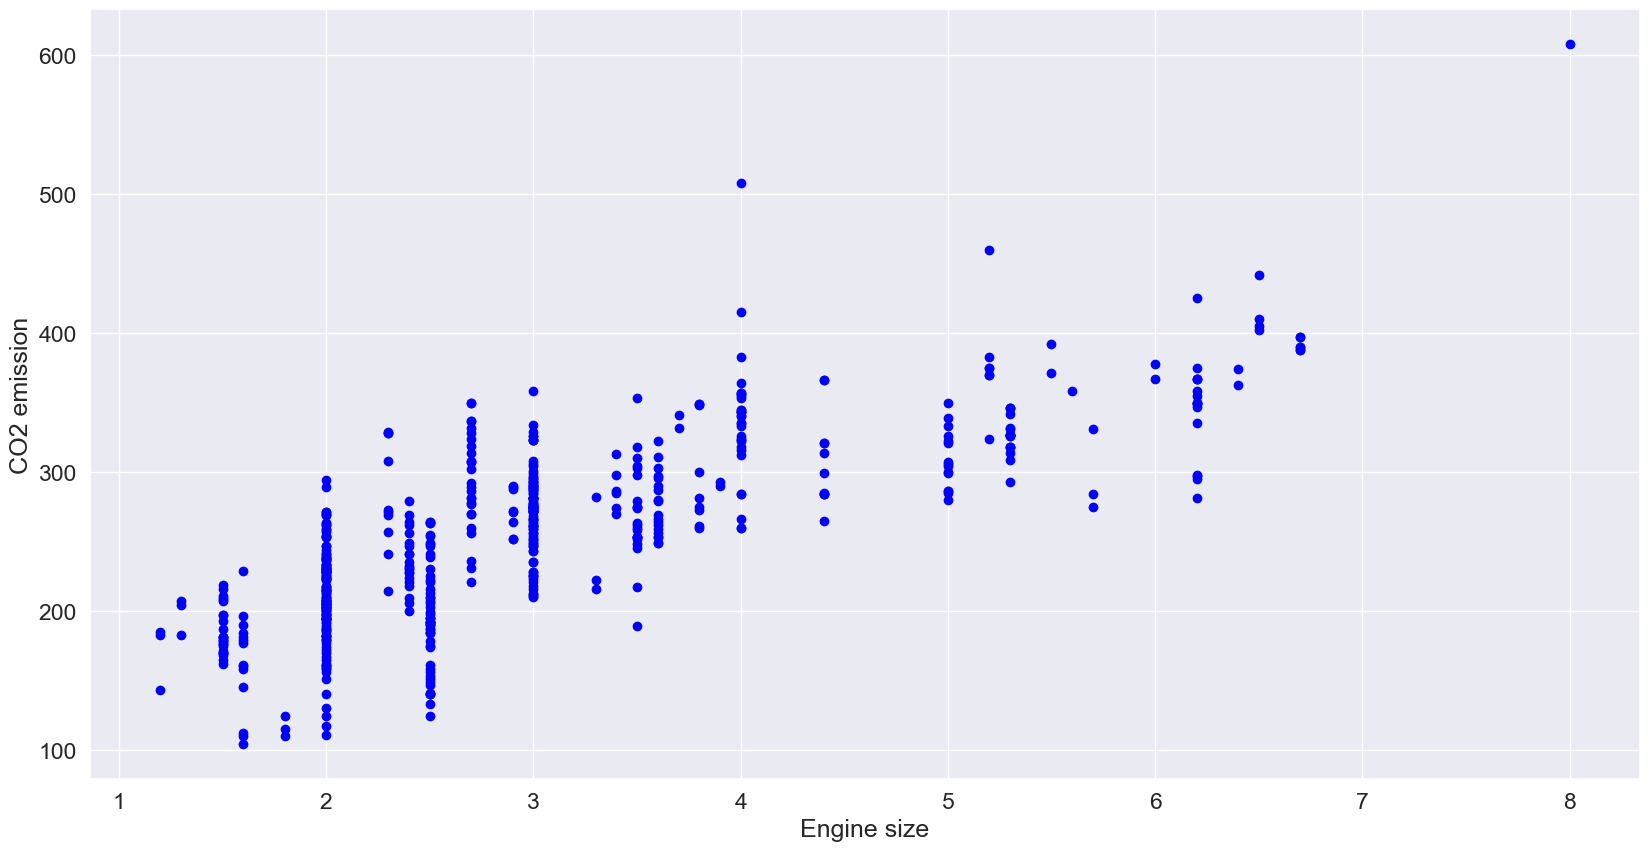

In [95]:
plt.figure(figsize = (20,10))
plt.scatter(train['Engine size (L)'], train['CO2 emissions (g/km)'], color = 'blue')
plt.xlabel('Engine size')
plt.ylabel('CO2 emission')
plt.show()

## Modeling

In [101]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
X = np.asarray(train[['Engine size (L)']])
y = np.asarray(train[['CO2 emissions (g/km)']])
regr.fit(X, y)


LinearRegression()

###### Checking the coefficient and Intercept

In [103]:
print('Coefficient: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficient:  [[40.45394263]]
Intercept:  [134.45812299]


Text(0, 0.5, 'CO2 Emission')

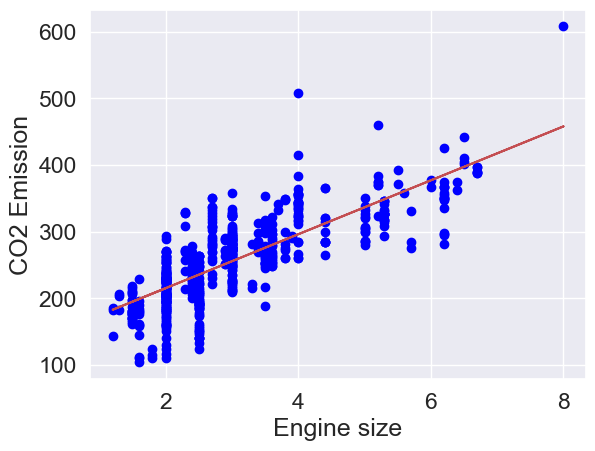

In [106]:
plt.scatter(train[['Engine size (L)']], train[['CO2 emissions (g/km)']], color = 'blue')
plt.plot(X, regr.coef_[0][0]*X + regr.intercept_[0], 'r')
plt.xlabel('Engine size')
plt.ylabel('CO2 Emission')

## Evaluation

In [147]:
from sklearn.metrics import r2_score

X_test = np.asarray(test[['Engine size (L)']])
y_test = np.asarray(test[['CO2 emissions (g/km)']])
y_pred = regr.predict(test_x)


In [148]:
from sklearn import metrics
print("Mean Absolute Error: %.2f" % metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Square: %.2f' % metrics.mean_squared_error(y_test, y_pred))
print('R2-score: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 29.57
Mean Squared Square: 1401.43
R2-score: 37.44
